In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


In [78]:
df_train = pd.read_csv('twitter_training.csv')
df_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [79]:
#add a label row at the top with the column names as Tweet ID,Entity,sentiment and tweet in sequence into the df_train dataframe
df_train.columns = ['Tweet ID', 'Entity', 'Sentiment', 'Tweet']
df_train.head()
df_train.describe
 

<bound method NDFrame.describe of        Tweet ID       Entity Sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74676      9200       Nvidia  Positive   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   

                                                   Tweet  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition 

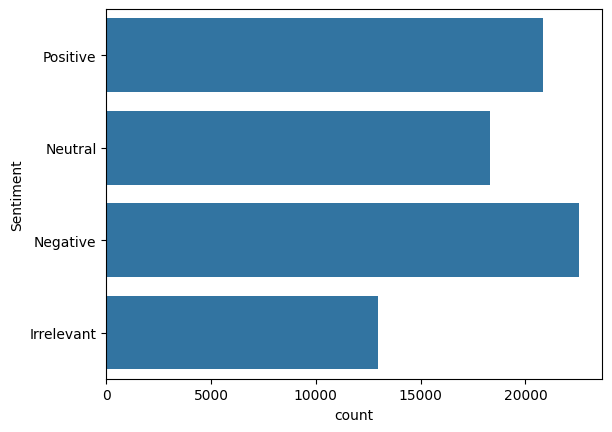

In [80]:
#plot the number of positive and negative tweets in the training data
sns.countplot(df_train['Sentiment'])
plt.show()


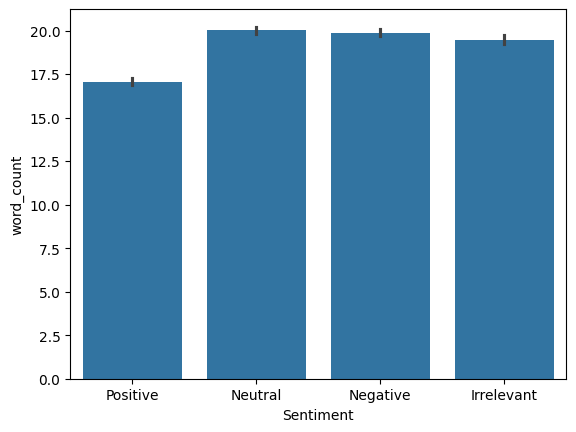

In [81]:
#make a bar plot of the average number of words in tweets for each sentiment
df_train['Tweet'] = df_train['Tweet'].fillna('')
df_train['word_count'] = df_train['Tweet'].apply(lambda x: len(x.split()))
sns.barplot(x='Sentiment', y='word_count', data=df_train)
plt.show()


In [82]:
#preprocess the tweets by removing stopwords, punctuation, and converting to lowercase and stemming
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(tweet)
    tokens = [ps.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Convert lists back to strings before preprocessing
df_train['Tweet'] = df_train['Tweet'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df_train['Tweet'] = df_train['Tweet'].apply(preprocess_tweet)
df_train.head()





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Tweet ID,Entity,Sentiment,Tweet,word_count
0,2401,Borderlands,Positive,come border kill,12
1,2401,Borderlands,Positive,im get borderland kill,10
2,2401,Borderlands,Positive,im come borderland murder,10
3,2401,Borderlands,Positive,im get borderland 2 murder,12
4,2401,Borderlands,Positive,im get borderland murder,10


In [83]:
#vectorize the tweets using TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=100)
X = tfidf.fit_transform(df_train['Tweet'])
X = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
X.head()


,actual,also,amaz,amazon,back,bad,ban,battlefield,best,borderland,...,wait,want,watch,well,win,work,world,would,xbox,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.617098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
#from df_train drop entire tweet column
df_train = df_train.drop(columns=['Tweet'])
df_train.head()

,Tweet ID,Entity,Sentiment,word_count
0,2401,Borderlands,Positive,12
1,2401,Borderlands,Positive,10
2,2401,Borderlands,Positive,10
3,2401,Borderlands,Positive,12
4,2401,Borderlands,Positive,10


In [85]:
#merge the vectorized tweets with the original training data
df_train = pd.concat([df_train, X], axis=1)
df_train.head()


,Tweet ID,Entity,Sentiment,word_count,actual,also,amaz,amazon,back,bad,...,wait,want,watch,well,win,work,world,would,xbox,year
0,2401,Borderlands,Positive,12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2401,Borderlands,Positive,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2401,Borderlands,Positive,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2401,Borderlands,Positive,12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2401,Borderlands,Positive,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Encode the target variable
le = LabelEncoder()
entity_le = LabelEncoder()
df_train['Sentiment'] = le.fit_transform(df_train['Sentiment'])

# Convert 'Entity' column to numeric using LabelEncoder
df_train['Entity'] = entity_le.fit_transform(df_train['Entity'])

# Split the data into features and target
X = df_train.drop(columns=['Sentiment', 'Tweet ID'])
y = df_train['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stratified K-Fold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):
    # Define the parameter search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 600),
        'max_depth': trial.suggest_int('max_depth', 7, 11),
        'learning_rate': trial.suggest_float('learning_rate', 0.2, 0.3 , log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0 , log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0, log=True),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    # Initialize the model with suggested parameters
    xgb = XGBClassifier(**params)
    
    # Perform cross-validation
    scores = cross_val_score(xgb, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    return scores.mean()

# Create the study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Get the best parameters
best_params = study.best_params
print(f'Best Parameters: {best_params}')



[I 2025-01-01 20:51:16,491] A new study created in memory with name: no-name-c984fb72-a3d2-411b-a97d-fb552f766ac9
[I 2025-01-01 20:51:43,140] Trial 0 finished with value: 0.6348921581490894 and parameters: {'n_estimators': 336, 'max_depth': 9, 'learning_rate': 0.24030111749228986, 'min_child_weight': 10, 'subsample': 0.6698926819647367, 'colsample_bytree': 0.841893256899666, 'gamma': 0.0009588616017949876, 'reg_alpha': 4.305972773913201e-05, 'reg_lambda': 0.02947438752097936}. Best is trial 0 with value: 0.6348921581490894.
[I 2025-01-01 20:52:24,334] Trial 1 finished with value: 0.6828300673465397 and parameters: {'n_estimators': 563, 'max_depth': 9, 'learning_rate': 0.2541516917105841, 'min_child_weight': 5, 'subsample': 0.9715907313253995, 'colsample_bytree': 0.7029298609179284, 'gamma': 8.921014439852818e-08, 'reg_alpha': 2.7490207421729328e-05, 'reg_lambda': 0.07398006166873988}. Best is trial 1 with value: 0.6828300673465397.
[I 2025-01-01 20:52:54,933] Trial 2 finished with valu

Best Parameters: {'n_estimators': 404, 'max_depth': 10, 'learning_rate': 0.2736217566411805, 'min_child_weight': 1, 'subsample': 0.7322421538561996, 'colsample_bytree': 0.6889995556305936, 'gamma': 5.0684688002341874e-08, 'reg_alpha': 0.009320005692963268, 'reg_lambda': 1.147827801051256e-08}


In [92]:
# Train the model with the best parameters
xgb = XGBClassifier(**best_params)
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

#plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#plot the feature importance
feature_importance = xgb.feature_importances_
features = X.columns
sns.barplot(x=feature_importance, y=features)
plt.show()





ValueError: feature_names mismatch: ['Entity', 'word_count', 'actual', 'also', 'amaz', 'amazon', 'back', 'bad', 'ban', 'battlefield', 'best', 'borderland', 'buy', 'call', 'cant', 'come', 'day', 'dead', 'dont', 'eamaddennfl', 'even', 'ever', 'everi', 'excit', 'facebook', 'feel', 'fifa', 'first', 'fix', 'fuck', 'fun', 'game', 'get', 'go', 'good', 'googl', 'got', 'great', 'gta', 'guy', 'help', 'home', 'im', 'ive', 'johnson', 'know', 'last', 'legend', 'like', 'live', 'look', 'love', 'make', 'microsoft', 'much', 'need', 'never', 'new', 'nvidia', 'one', 'overwatch', 'peopl', 'play', 'player', 'pleas', 'pubg', 'realli', 'red', 'redempt', 'rhandlerr', 'right', 'say', 'see', 'seri', 'shit', 'start', 'still', 'stop', 'stream', 'take', 'team', 'thank', 'thing', 'think', 'time', 'today', 'tri', 'unk', 'us', 'use', 'verizon', 'video', 'wait', 'want', 'watch', 'well', 'win', 'work', 'world', 'would', 'xbox', 'year'] ['actual', 'also', 'amaz', 'amazon', 'back', 'bad', 'ban', 'battlefield', 'best', 'borderland', 'buy', 'call', 'cant', 'come', 'day', 'dead', 'dont', 'eamaddennfl', 'even', 'ever', 'everi', 'excit', 'facebook', 'feel', 'fifa', 'first', 'fix', 'fuck', 'fun', 'game', 'get', 'go', 'good', 'googl', 'got', 'great', 'gta', 'guy', 'help', 'home', 'im', 'ive', 'johnson', 'know', 'last', 'legend', 'like', 'live', 'look', 'love', 'make', 'microsoft', 'much', 'need', 'never', 'new', 'nvidia', 'one', 'overwatch', 'peopl', 'play', 'player', 'pleas', 'pubg', 'realli', 'red', 'redempt', 'rhandlerr', 'right', 'say', 'see', 'seri', 'shit', 'start', 'still', 'stop', 'stream', 'take', 'team', 'thank', 'thing', 'think', 'time', 'today', 'tri', 'unk', 'us', 'use', 'verizon', 'video', 'wait', 'want', 'watch', 'well', 'win', 'work', 'world', 'would', 'xbox', 'year']
expected Entity, word_count in input data

In [88]:
df_test = pd.read_csv('twitter_validation.csv')

#add a label row at the top with the column names as Tweet ID,Entity,sentiment and tweet in sequence into the df_test dataframe
df_test.columns = ['Tweet ID', 'Entity', 'Sentiment', 'Tweet']
df_test.head()



,Tweet ID,Entity,Sentiment,Tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [89]:
#preprocess the tweets by removing stopwords, punctuation, and converting to lowercase and stemming
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string


stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(tweet)
    tokens = [ps.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Convert lists back to strings before preprocessing
df_test['Tweet'] = df_test['Tweet'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df_test['Tweet'] = df_test['Tweet'].apply(preprocess_tweet)
df_test.head()



,Tweet ID,Entity,Sentiment,Tweet
0,352,Amazon,Neutral,bbc news amazon boss jeff bezo reject claim co...
1,8312,Microsoft,Negative,microsoft pay word function poorli samsungu ch...
2,4371,CS-GO,Negative,csgo matchmak full closet hack truli aw game
3,4433,Google,Neutral,presid slap american face realli commit unlaw ...
4,6273,FIFA,Negative,hi eahelp ’ madelein mccann cellar past 13 yea...


In [90]:
#vectorize the tweets using TF-IDF
X_test = tfidf.transform(df_test['Tweet'])
X_test = pd.DataFrame(X_test.toarray(), columns=tfidf.get_feature_names_out())
X_test.head()

# Add the word_count column to the test data
df_test['word_count'] = df_test['Tweet'].apply(lambda x: len(x.split()))

#merge the vectorized tweets with the original test data
df_test = df_test.drop(columns=['Tweet'])
df_test = pd.concat([df_test, X_test], axis=1)
df_test.head()


,Tweet ID,Entity,Sentiment,word_count,actual,also,amaz,amazon,back,bad,...,wait,want,watch,well,win,work,world,would,xbox,year
0,352,Amazon,Neutral,14,0.0,0.0,0.0,0.780712,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,8312,Microsoft,Negative,8,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,4371,CS-GO,Negative,8,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,4433,Google,Neutral,12,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,6273,FIFA,Negative,28,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.365647,0.0,0.0,0.0,0.360476


In [95]:
# Encode the 'Entity' column
# Ensure the LabelEncoder is fitted with all possible labels
df_test['Entity'] = entity_le.transform(df_test['Entity'])

# Encode the 'Sentiment' column
df_test['Sentiment'] = le.transform(df_test['Sentiment'])

# Split the data into features and target
X_test = df_test.drop(columns=['Sentiment', 'Tweet ID'])
y_test = df_test['Sentiment']

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.7687687687687688
Confusion Matrix:
[[113  22  13  23]
 [  7 216  24  19]
 [ 11  28 216  30]
 [  6  19  29 223]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       171
           1       0.76      0.81      0.78       266
           2       0.77      0.76      0.76       285
           3       0.76      0.81      0.78       277

    accuracy                           0.77       999
   macro avg       0.78      0.76      0.76       999
weighted avg       0.77      0.77      0.77       999

